In [123]:
!pip3 install pandas yfinance matplotlib prophet

In [124]:
from datetime import datetime

nome_acao = 'AZUL'
data_inicio = '2022-01-01'
data_fim = datetime.today().strftime('%Y-%m-%d')
data_corte_treino = datetime.today().strftime('%Y-%m-%d')
dias_previsao = 30
codigo_pais = 'BR'

In [125]:
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [126]:
df = yf.download(
    nome_acao,
    start=data_inicio,
    end=data_fim,
    progress=False).reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,12.850,13.455,12.670,12.99,12.99,2171200
1,2022-01-04,12.900,13.120,12.755,12.90,12.90,1744700
2,2022-01-05,12.600,12.950,11.780,11.80,11.80,2500000
3,2022-01-06,11.710,12.200,11.310,12.18,12.18,2946100
4,2022-01-07,12.305,12.880,12.300,12.80,12.80,2012000
...,...,...,...,...,...,...,...
557,2024-03-22,8.520,8.630,8.355,8.40,8.40,940600
558,2024-03-25,8.450,8.520,8.335,8.45,8.45,616600
559,2024-03-26,8.430,8.640,8.380,8.40,8.40,929400
560,2024-03-27,8.460,8.610,8.305,8.53,8.53,1014900


In [127]:
df_treino = df[df['Date'] < data_corte_treino]
df_teste = df[df['Date'] >= data_corte_treino]

In [128]:
df_prophet = df[['Date', 'Close']].rename(
    columns={'Date': 'ds', 'Close': 'y'}
)
df_prophet

,ds,y
0,2022-01-03,12.99
1,2022-01-04,12.90
2,2022-01-05,11.80
3,2022-01-06,12.18
4,2022-01-07,12.80
...,...,...
557,2024-03-22,8.40
558,2024-03-25,8.45
559,2024-03-26,8.40
560,2024-03-27,8.53


In [129]:
modelo = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=True)
modelo.add_country_holidays(country_name=codigo_pais)
modelo.fit(df_prophet)

10:30:45 - cmdstanpy - INFO - Chain [1] start processing
10:30:46 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
futuro = modelo.make_future_dataframe(periods=dias_previsao)
df_previsao = modelo.predict(futuro)
df_previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Confraternização Universal,Confraternização Universal_lower,Confraternização Universal_upper,Dia do Trabalhador,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,13.778669,13.991061,17.807195,13.778669,13.778669,0.0,0.0,0.0,0.0,...,0.140743,0.140743,0.140743,-1.504029,-1.504029,-1.504029,0.0,0.0,0.0,15.866131
1,2022-01-04,13.732867,13.854791,17.753842,13.732867,13.732867,0.0,0.0,0.0,0.0,...,0.143966,0.143966,0.143966,-1.565756,-1.565756,-1.565756,0.0,0.0,0.0,15.761825
2,2022-01-05,13.687064,13.882128,17.665475,13.687064,13.687064,0.0,0.0,0.0,0.0,...,0.219511,0.219511,0.219511,-1.622218,-1.622218,-1.622218,0.0,0.0,0.0,15.735104
3,2022-01-06,13.641261,13.520178,17.483267,13.641261,13.641261,0.0,0.0,0.0,0.0,...,0.164319,0.164319,0.164319,-1.672418,-1.672418,-1.672418,0.0,0.0,0.0,15.583910
4,2022-01-07,13.595459,13.608723,17.473898,13.595459,13.595459,0.0,0.0,0.0,0.0,...,0.194146,0.194146,0.194146,-1.715435,-1.715435,-1.715435,0.0,0.0,0.0,15.524917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2024-04-23,5.830356,7.432571,11.371001,5.795045,5.880321,0.0,0.0,0.0,0.0,...,0.143966,0.143966,0.143966,-0.034532,-0.034532,-0.034532,0.0,0.0,0.0,9.390538
588,2024-04-24,5.832104,7.512510,11.188347,5.794382,5.885948,0.0,0.0,0.0,0.0,...,0.219511,0.219511,0.219511,-0.134670,-0.134670,-0.134670,0.0,0.0,0.0,9.367692
589,2024-04-25,5.833852,7.365643,11.299097,5.793607,5.892086,0.0,0.0,0.0,0.0,...,0.164319,0.164319,0.164319,-0.230108,-0.230108,-0.230108,0.0,0.0,0.0,9.218811
590,2024-04-26,5.835601,7.305956,10.997716,5.793241,5.898284,0.0,0.0,0.0,0.0,...,0.194146,0.194146,0.194146,-0.318882,-0.318882,-0.318882,0.0,0.0,0.0,9.161612


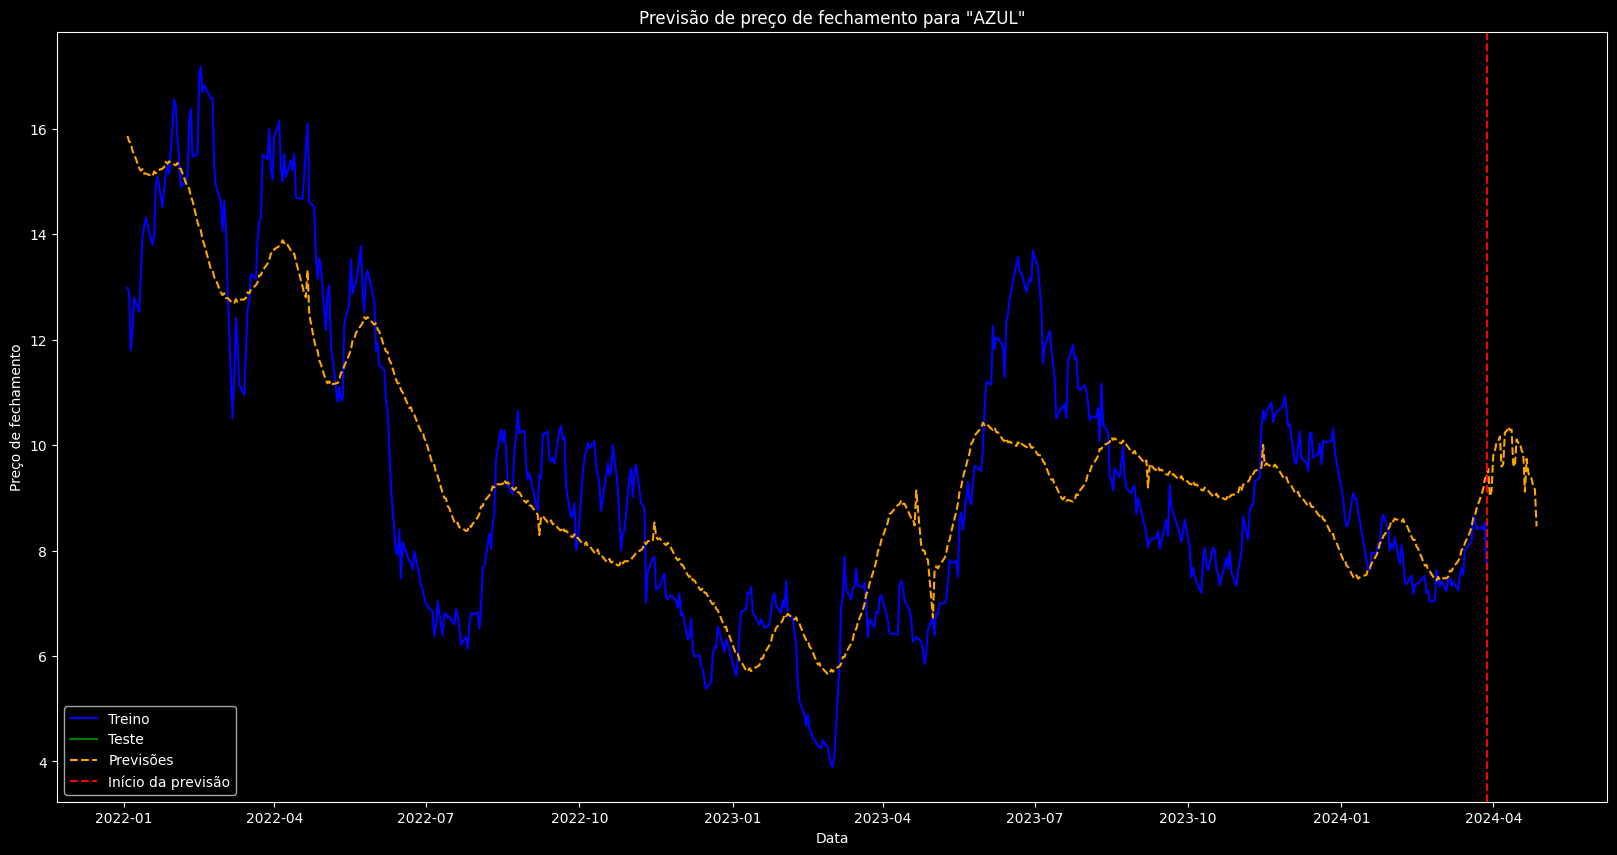

In [131]:
plt.figure(figsize=(20, 10))
plt.plot(
    df_treino['Date'],
    df_treino['Close'],
    color='blue',
    label='Treino',
)
plt.plot(
    df_teste['Date'],
    df_teste['Close'],
    color='green',
    label='Teste',
)
plt.plot(
    df_previsao['ds'],
    df_previsao['yhat'],
    color='orange',
    label='Previsões',
    linestyle='--'
)
plt.axvline(
    x=df_treino['Date'].max(),
    color='red',
    linestyle='--',
    label='Início da previsão'
)
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.title('Previsão de preço de fechamento para "%s"'%nome_acao)
plt.legend()
plt.show()